In [201]:
# Load Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [16]:
data = pd.read_csv('Womens Clothing E-Commerce Reviews.csv', index_col=0)

In [17]:
data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [18]:
data.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


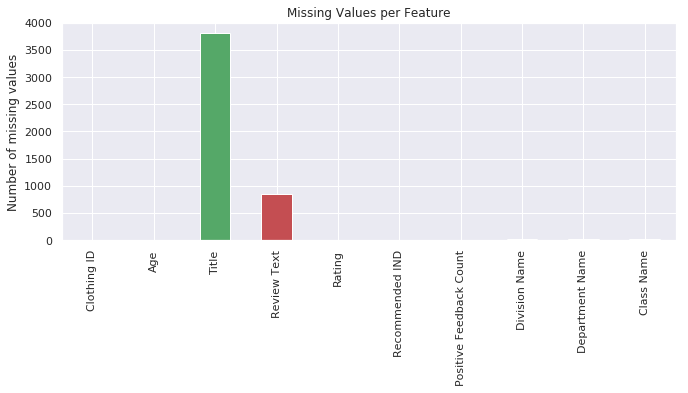

In [164]:
#the amount of missing values per feature
sns.set(rc={'figure.figsize':(11,4)})
pd.isnull(data).sum().plot(kind='bar')
plt.ylabel('Number of missing values')
plt.title('Missing Values per Feature');

# EDA

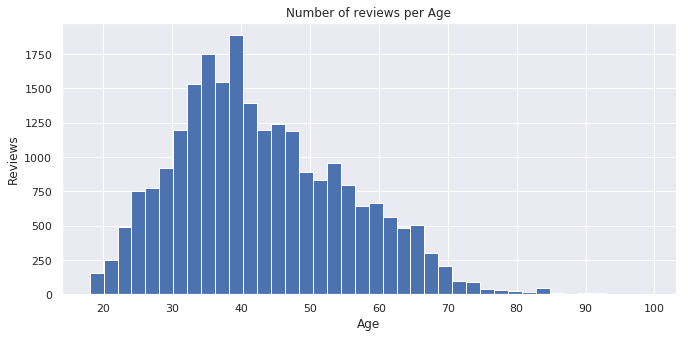

In [55]:
# Lets see the age distribution first
sns.set(rc={'figure.figsize':(11,5)})
plt.hist(data.Age, bins=40)
plt.xlabel('Age')
plt.ylabel('Reviews')
plt.title('Number of reviews per Age');

We can say that, age group 25-50 is the most revieving age group (target :))

Now, let's have a look at the distribution of ratings per age.

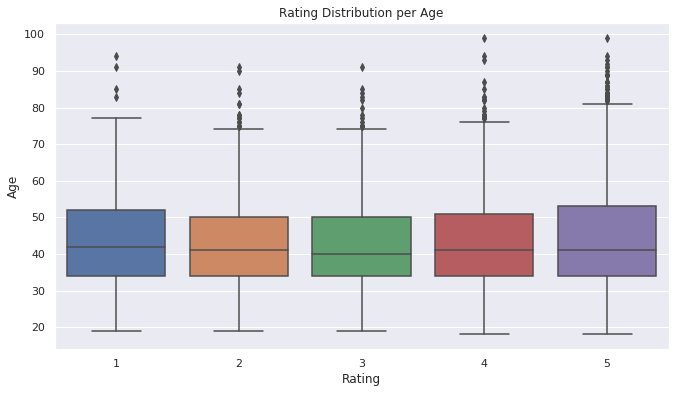

In [62]:
sns.set(rc={'figure.figsize':(11,6)})
sns.boxplot(x = 'Rating', y = 'Age', data = data)
plt.title('Rating Distribution per Age');

It looks like upper/lower quartiles and medians are pretty much close to each other, which means rating scores are not mainly related with the age. Or we can't say that, the young is more happy.
And pls note this is not the distribution of rating scores. It's coming next.

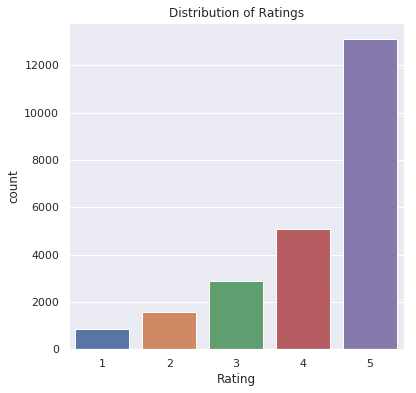

In [66]:
sns.set(rc={'figure.figsize':(6,6)})
plt.title('Distribution of Ratings')
sns.countplot(x = 'Rating', data = data);

Rating scores are showing a general satisfaction but of course companies need to work more to make it better.

Now let's have a look at the distributions of Division/Department/Class

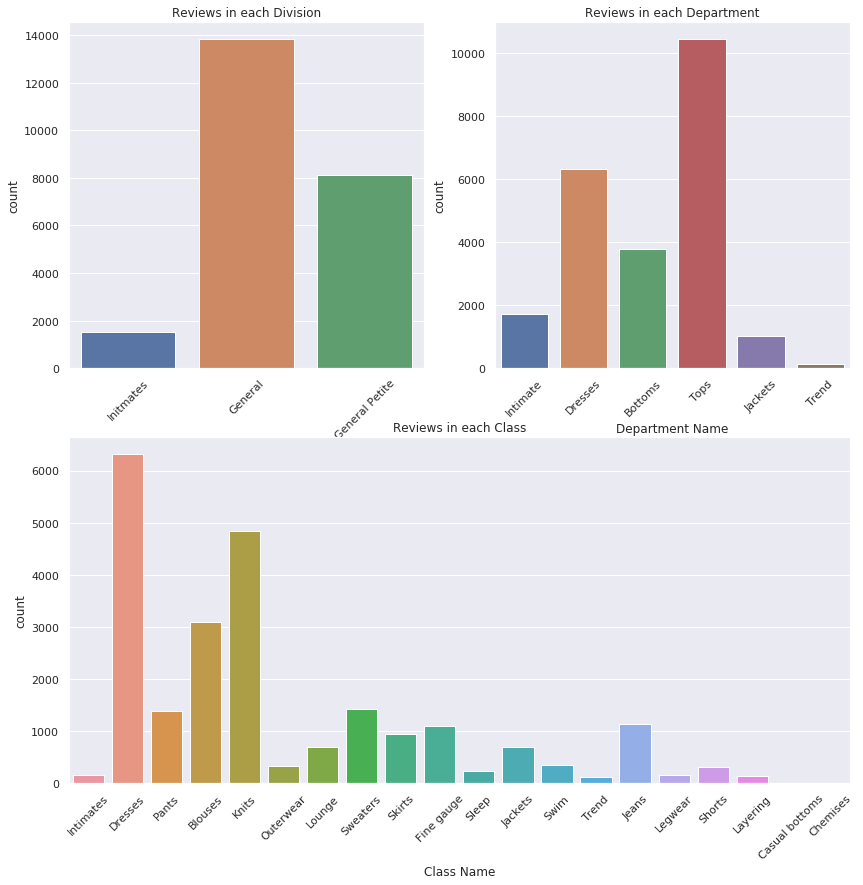

In [160]:
fig = plt.figure(figsize=(14, 14))
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1 = plt.xticks(rotation=45)
ax1 = sns.countplot(data['Division Name'])
ax1 = plt.title("Reviews in each Division")


ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2 = plt.xticks(rotation=45)
ax2 = sns.countplot(data['Department Name'])
ax2 = plt.title("Reviews in each Department")


ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3 = plt.xticks(rotation=45)
ax3 = sns.countplot(data['Class Name'])
ax3 = plt.title("Reviews in each Class")


And now, let's check the rate of recommendations.

In [192]:
recommended = data[data['Recommended IND']==1]
not_recommended = data[data['Recommended IND']==0]

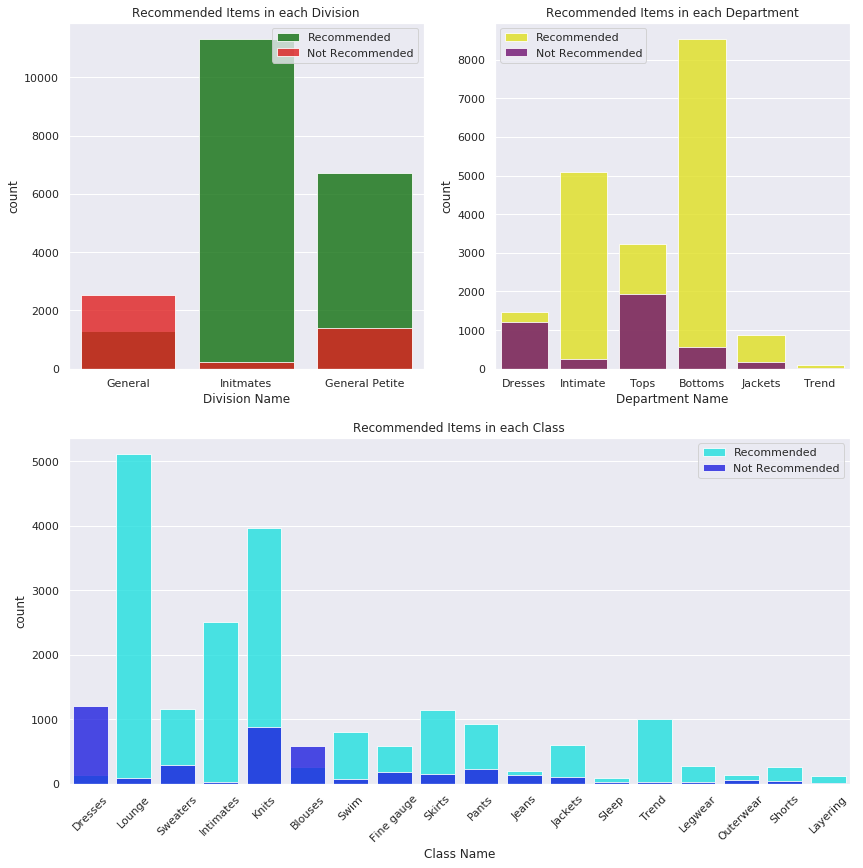

In [193]:
fig = plt.figure(figsize=(14, 14))
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1 = sns.countplot(recommended['Division Name'], color = "green", alpha = 0.8, label = "Recommended")
ax1 = sns.countplot(not_recommended['Division Name'], color = "red", alpha = 0.8, label = "Not Recommended")
ax1 = plt.title("Recommended Items in each Division")
ax1 = plt.legend()

ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2 = sns.countplot(recommended['Department Name'], color="yellow", alpha = 0.8, label = "Recommended")
ax2 = sns.countplot(not_recommended['Department Name'], color="purple", alpha = 0.8, label = "Not Recommended")
ax2 = plt.title("Recommended Items in each Department")
ax2 = plt.legend()

ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3 = plt.xticks(rotation=45)
ax3 = sns.countplot(recommended['Class Name'], color="cyan", alpha = 0.8, label = "Recommended")
ax3 = sns.countplot(not_recommended['Class Name'], color="blue", alpha = 0.8, label = "Not Recommended")
ax3 = plt.title("Recommended Items in each Class")
ax3 = plt.legend()

OMG! Dresses deparment need urgent care

What's the most popular item?

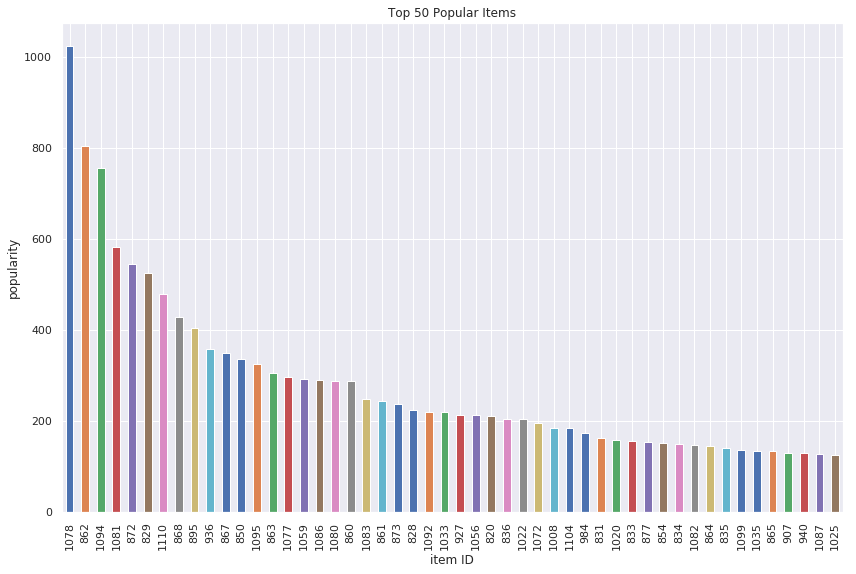

In [185]:
fig = plt.figure(figsize=(14, 9))
plt.xticks(rotation=45)
plt.xlabel('item ID')
plt.ylabel('popularity')
plt.title("Top 50 Popular Items")
data['Clothing ID'].value_counts()[:50].plot(kind='bar');


This plot might be higly valuable for the corporate buyers 

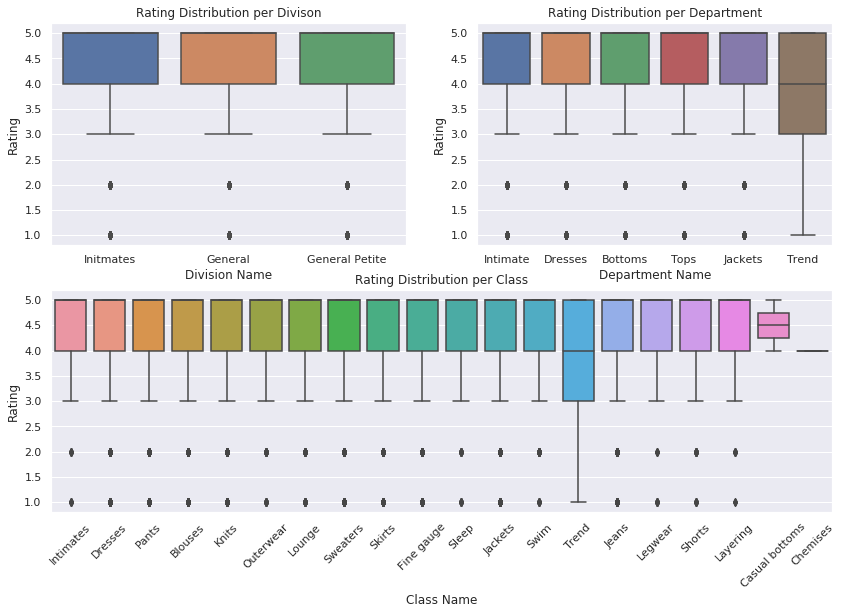

In [156]:
fig = plt.figure(figsize=(14, 9))

ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1 = sns.boxplot(x="Division Name", y="Rating", data=data)
ax1 = plt.title('Rating Distribution per Divison')

ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2 = sns.boxplot(x="Department Name", y="Rating", data=data)
ax2 = plt.title('Rating Distribution per Department')

ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3 = plt.xticks(rotation=45)
ax3 = sns.boxplot(x="Class Name", y="Rating", data=data)
ax3 = plt.title('Rating Distribution per Class')

I can't understand why the Dress department has so many negative recommendations but high ratings.
I'll come back to this point later

# Natural Language Processing

In this part, I'll try;
- Word tokenization with NLTK
- Word tokenization with Regex 
- Text preprocessing
- Gensim
- Tf-idf
- NER (Named Entity Recognition)
- SpaCy

In [365]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import regexp_tokenize
from nltk.corpus import stopwords
from collections import Counter
from nltk.stem import WordNetLemmatizer
from gensim.corpora.dictionary import Dictionary
from collections import defaultdict
from gensim.models.tfidfmodel import TfidfModel
import spacy
import itertools
import re

In [187]:
data[["Title","Review Text", "Rating"]].head()

,Title,Review Text,Rating
0,NaN,Absolutely wonderful - silky and sexy and comf...,4
1,NaN,Love this dress! it's sooo pretty. i happene...,5
2,Some major design flaws,I had such high hopes for this dress and reall...,3
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5
4,Flattering shirt,This shirt is very flattering to all due to th...,5


Mergin all reviews into one single variable (reviews)

In [198]:
reviews = data["Review Text"].str.lower().str.cat(sep=' ')

Tokenization with nltk and regex

In [223]:
# Use word_tokenize to tokenize the reviews
words_w = word_tokenize(reviews)

# Use regexp to tokenize the reviews
words_regexp = regexp_tokenize(reviews, r'\w+')

In [216]:
# Make a set of unique tokens in the entire reviews:
#unique_tokens = set(words)

## Text Preprocessing

- With NLTK 

In [228]:
# Retain alphabetic words
alpha_only = [t for t in words_w if t.isalpha()]

In [230]:
# Remove all stop words
english_stops = set(stopwords.words('english'))
no_stops = [t for t in alpha_only if t not in english_stops]

In [231]:
# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [234]:
# Lemmatize all tokens into a new list
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

In [235]:
# Create the bag-of-words
bow = Counter(lemmatized)

In [236]:
# Print the 10 most common tokens
print(bow.most_common(10))

[('dress', 11337), ('fit', 10121), ('size', 9360), ('love', 8979), ('top', 8273), ('like', 7032), ('color', 6908), ('look', 6885), ('wear', 6519), ('great', 6094)]


- With regex

In [237]:
# Retain alphabetic words
alpha_only = [t for t in words_regexp if t.isalpha()]

In [238]:
# Remove all stop words
no_stops = [t for t in alpha_only if t not in english_stops]

In [239]:
# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [240]:
# Lemmatize all tokens into a new list
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

In [241]:
# Create the bag-of-words
bow = Counter(lemmatized)

In [242]:
# Print the 10 most common tokens
print(bow.most_common(10))

[('dress', 11438), ('fit', 10180), ('size', 9439), ('love', 9004), ('top', 8370), ('like', 7175), ('color', 6987), ('look', 6914), ('wear', 6537), ('great', 6117)]


NLTK and Regex tokenizations providing the same sequence but regex tokenization has higher frequencies 

# GENSIM

In [298]:
# Create a Dictionary from the articles
dictionary = Dictionary([lemmatized])

In [322]:
# Create a MmCorpus
corpus = [dictionary.doc2bow(lemmatized)]

In [300]:
# Sort the reviews for frequency
bow_doc = sorted(corpus, key=lambda w: w[1], reverse=True)

In [301]:
# Print the top 10 words of the reviews alongside the count
for word_id, word_count in bow_doc[0][:10]:
    print(dictionary.get(word_id), word_count)

aa 3
aaaaaaamazing 1
aaaaandidon 1
aaaaannnnnnd 1
aaaahmazing 1
aaaahs 1
aaahed 1
aame 1
ab 4
abbey 2


In [302]:
# Create the defaultdict:
total_word_count = defaultdict(int)
for word_id, word_count in itertools.chain.from_iterable(corpus):
    total_word_count[word_id] += word_count

In [303]:
# Create a sorted list from the defaultdict
sorted_word_count = sorted(total_word_count.items(), key=lambda w: w[1], reverse=True) 

In [304]:
# Print the top 10 words across all documents alongside the count
for word_id, word_count in sorted_word_count[:10]:
    print(dictionary.get(word_id), word_count)


dress 11438
fit 10180
size 9439
love 9004
top 8370
like 7175
color 6987
look 6914
wear 6537
great 6117


## Tf-idf (Term frequency-inverce document frequency)

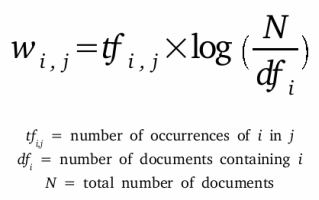

In [323]:
# Create a new TfidfModel using the corpus
tfidf = TfidfModel(corpus)

In [337]:
# Calculate the tfidf weights of reviews
tfidf_weights = tfidf[corpus[0]]

In [338]:
# Print the first five weights
print(tfidf_weights[:5])

[]


## NER (Named Entity Recognition)

In [343]:
tagged_text = nltk.pos_tag(lemmatized)

In [345]:
tagged_text[:5]

[('absolutely', 'RB'),
 ('wonderful', 'JJ'),
 ('silky', 'JJ'),
 ('sexy', 'NN'),
 ('comfortable', 'JJ')]

In [350]:
chunked_sentences = nltk.ne_chunk(tagged_text)

In [351]:
# Create the defaultdict
ner_categories = defaultdict(int)

In [352]:
# Create the nested for loop
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1
            

In [357]:
# Create a list from the dictionary keys for the chart labels: labels
labels = list(ner_categories.keys())

In [354]:
# Create a list of the values: values
values = [ner_categories.get(l) for l in labels]

In [362]:
values, labels

([], [])

In [363]:
# Create the pie chart
#plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
# Display the chart
#plt.show()

# SpaCy

In [367]:
nlp = spacy.load('en')

In [368]:
nlp.entity

In [377]:
#nlp.max_length = 200000

In [376]:
doc = nlp(str(lemmatized))

MemoryError: 

In [ ]:
for ent in doc.ents:
    print(ent.label_, ent.text)

# Supervised ML with NLP

In [378]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer